# Spatial Data Analysis using Python

### Author: Fasih Uddin

#### Date: 17-12-2023


## Part 1

Introduction to vector format spatial data - points, lines, and polygons

Following sections are all part of:
**1.1**
- Import your shapefile (use the data from the first assignment)

In [71]:
# import shapefile from drive E

# define directory
import os
os.chdir(r"E:\friend_works\Fasih") # change the path to your shapefile location


# import libraries
import geopandas as gpd
import pandas as pd
import fiona
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = "macedonia\points" # change the path to your shapefile location

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)


In [72]:
# show the attribute of the shapefile

print(gdf.head())

# description about the shapefile
print(gdf.describe())


      osm_id             timestamp name             type  \
0  170637652  2012-07-26T10:21:39Z  NaN  traffic_signals   
1  170637653  2013-06-03T11:11:00Z  NaN  traffic_signals   
2  170637656  2013-06-03T11:11:00Z  NaN  traffic_signals   
3  170640007  2013-07-15T10:07:46Z  NaN         crossing   
4  170643837  2013-07-15T10:07:46Z  NaN         crossing   

                    geometry  
0  POINT (21.43262 41.99398)  
1  POINT (21.43238 41.99413)  
2  POINT (21.43095 41.99450)  
3  POINT (21.42951 41.99879)  
4  POINT (21.42943 41.99920)  
           osm_id             timestamp       name        type  \
count        3613                  3613       2002        3613   
unique       3613                  2473       1638         159   
top     170637652  2013-09-14T20:33:23Z  Макпетрол  restaurant   
freq            1                    17        111         295   

                             geometry  
count                            3613  
unique                           3612  
to

In [35]:
# Display basic information about the GeoDataFrame/shapfile
print("Number of rows and columns:", gdf.shape)
print("\nColumns in the GeoDataFrame:")
print(gdf.columns)
print("\nGeometry type:")
print(gdf.geom_type)
# tell the geometric extent of the GeoDataFrame
print("\nGeometry bounds:")
print(gdf.total_bounds)



Number of rows and columns: (3613, 5)

Columns in the GeoDataFrame:
Index(['osm_id', 'timestamp', 'name', 'type', 'geometry'], dtype='object')

Geometry type:
0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
3608    Point
3609    Point
3610    Point
3611    Point
3612    Point
Length: 3613, dtype: object

Geometry bounds:
[20.5189355 40.8926112 23.034549  42.3239084]


In [36]:
# Show the metadata

# Access metadata using fiona
with fiona.open(shapefile_path, 'r') as src:
    metadata = src.meta
# Display metadata
print("Metadata:")
print(metadata)

Metadata:
{'driver': 'ESRI Shapefile', 'schema': {'properties': {'osm_id': 'str:11', 'timestamp': 'str:20', 'name': 'str:48', 'type': 'str:16'}, 'geometry': 'Point'}, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'), 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'}


In [37]:

# Get the number of features (rows) in the GeoDataFrame
num_features = len(gdf)

# Display the number of features
print("Number of features in the shapefile:", num_features)


Number of features in the shapefile: 3613


### Summary:

The shapefile we have loaded has a total of **3613** features, which means 3613 rows and it has 5 columns.

Columns in the GeoDataFrame:
Index(['osm_id', 'timestamp', 'name', 'type', 'geometry'], dtype='object')

Geometry bounds:
[20.5189355 40.8926112 23.034549  42.3239084]



## Plotting the shapefile

We have already imported the matplotlib in the first cell, which will be used to plot the shapefiles in following sections.

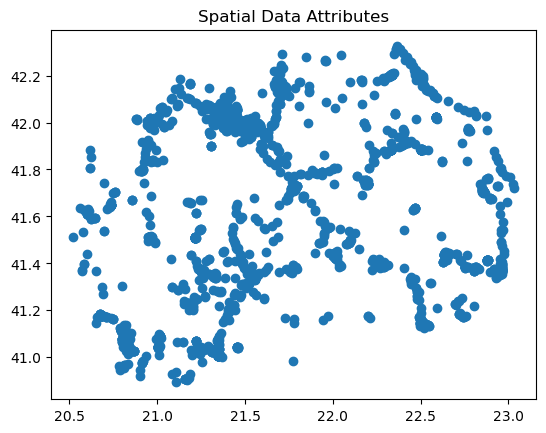

In [38]:
# Plot the spatial data
gdf.plot()
plt.title("Spatial Data Attributes")
plt.show()

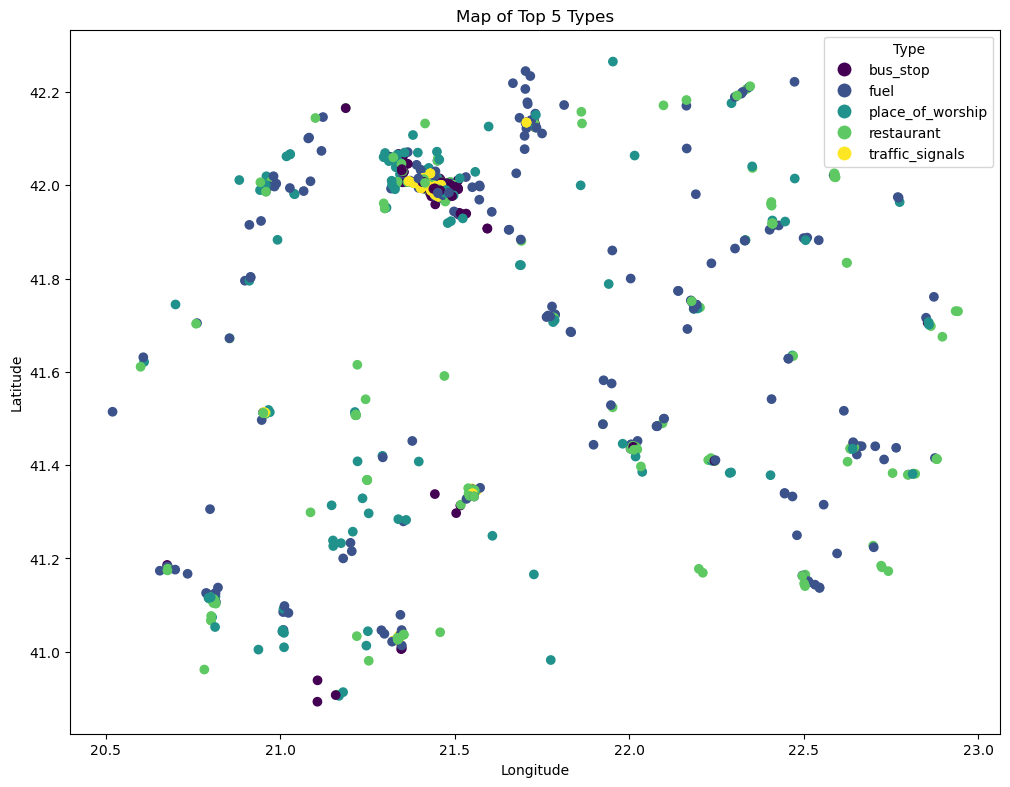

In [39]:
# plot the data with the attribute; add a legend and title

color_column = 'type' 
# Get the top 5 types based on their frequency
top_types = gdf[color_column].value_counts().nlargest(5).index

# Filter the GeoDataFrame to include only the top 5 types
gdf_top5 = gdf[gdf[color_column].isin(top_types)]

# Increase the plot size for a more detailed view
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data for the top 5 types
gdf_top5.plot(column=color_column, legend=True, cmap='viridis', ax=ax)

# Add a legend
legend = ax.get_legend()
legend.set_title('Type')

#x and y axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a title
plt.title('Map of Top 5 Types')

# Show the plot
plt.show()

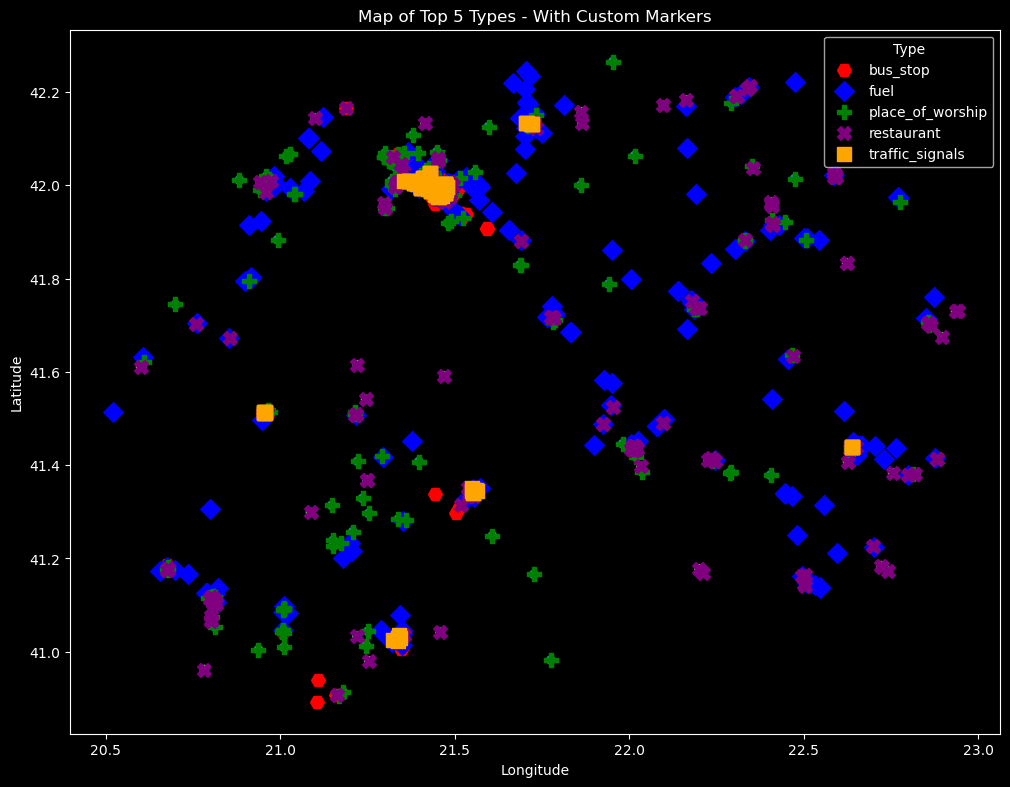

In [40]:
# change the plot color and symbol
# change background color of the plot
plt.style.use('dark_background')

color_column = 'type' 
# Get the top 5 types based on their frequency
top_types = gdf[color_column].value_counts().nlargest(5).index

# Filter the GeoDataFrame to include only the top 5 types
gdf_top5 = gdf[gdf[color_column].isin(top_types)]

# Increase the plot size for a more detailed view
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data for the top 5 types
gdf_top5.plot(column=color_column, legend=True, cmap='viridis', ax=ax)


# Customize point markers for point geometries based on 'type' with different colors
marker_styles = {'bus_stop': ('H', 'red'), 'fuel': ('D', 'blue'), 'place_of_worship': ('P', 'green'), 'restaurant': ('X', 'purple'), 'traffic_signals': ('s', 'orange')}

for typ, (marker, color) in marker_styles.items():
    subset = gdf_top5[gdf_top5[color_column] == typ]
    subset.plot(ax=ax, marker=marker, color=color, markersize=100, label=typ)

# Add a legend
legend = ax.legend()
legend.set_title('Type')

# axis title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
plt.title('Map of Top 5 Types - With Custom Markers')

# Show the plot
plt.show()

### Plot multiple shapefiles together with geopandas

- We will use the points as from the previous sections and we are going to use the "Admin Map" of Macedonia as the other shapefile to plot

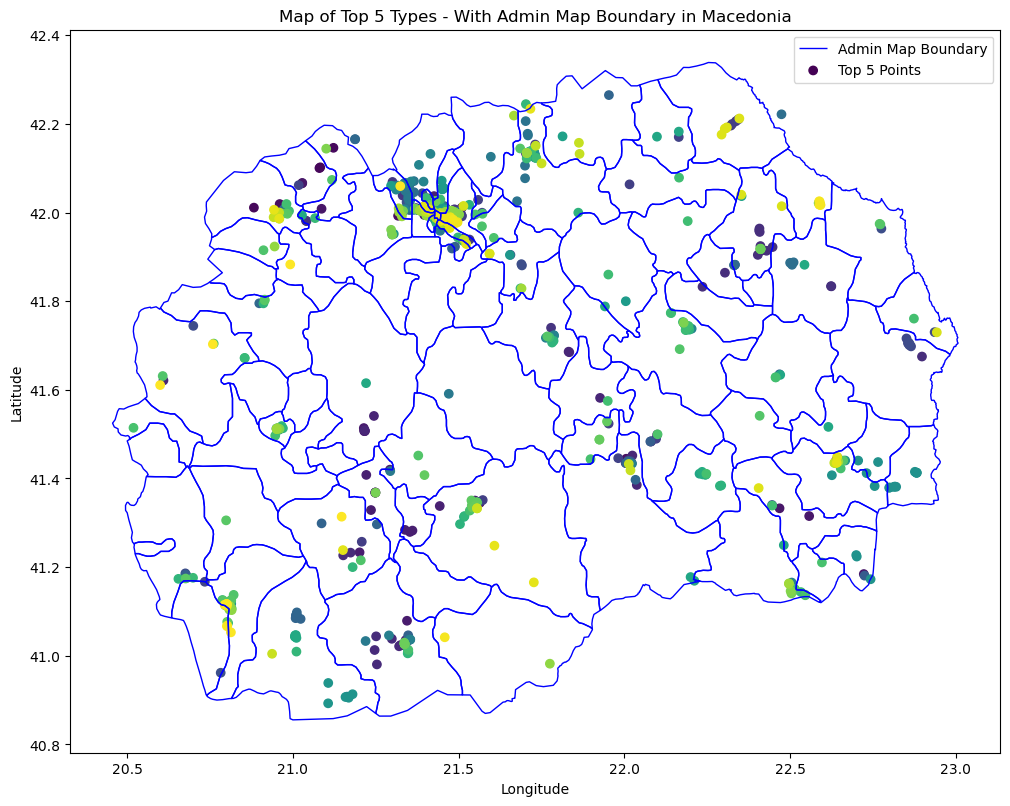

In [41]:
gdf_2 = gpd.read_file("macedonia\MKD_adm\MKD_adm1.shp") # change the path to your shapefile location
# change background to default

plt.style.use('default')
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the outlines of gdf_2
gdf_2.boundary.plot(ax=ax, color='blue', linewidth=1, label='Admin Map Boundary')  # Add label for legend

# Plot the points on gdf_2
gdf_top5.plot(ax=ax, linewidth=1, cmap='viridis', legend=True, label='Top 5 Points')

# Add legends for both gdf_2 and gdf_top5
ax.legend(loc='upper right')

# Add title
plt.title('Map of Top 5 Types - With Admin Map Boundary in Macedonia')

# Set axis titles
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [42]:
# Extract the bounding box coordinates
bounds = gdf.total_bounds

# Print the bounding box coordinates
print("Bounding Box Coordinates:")
print("Min X:", bounds[0])
print("Min Y:", bounds[1])
print("Max X:", bounds[2])
print("Max Y:", bounds[3])

Bounding Box Coordinates:
Min X: 20.5189355
Min Y: 40.8926112
Max X: 23.034549
Max Y: 42.3239084


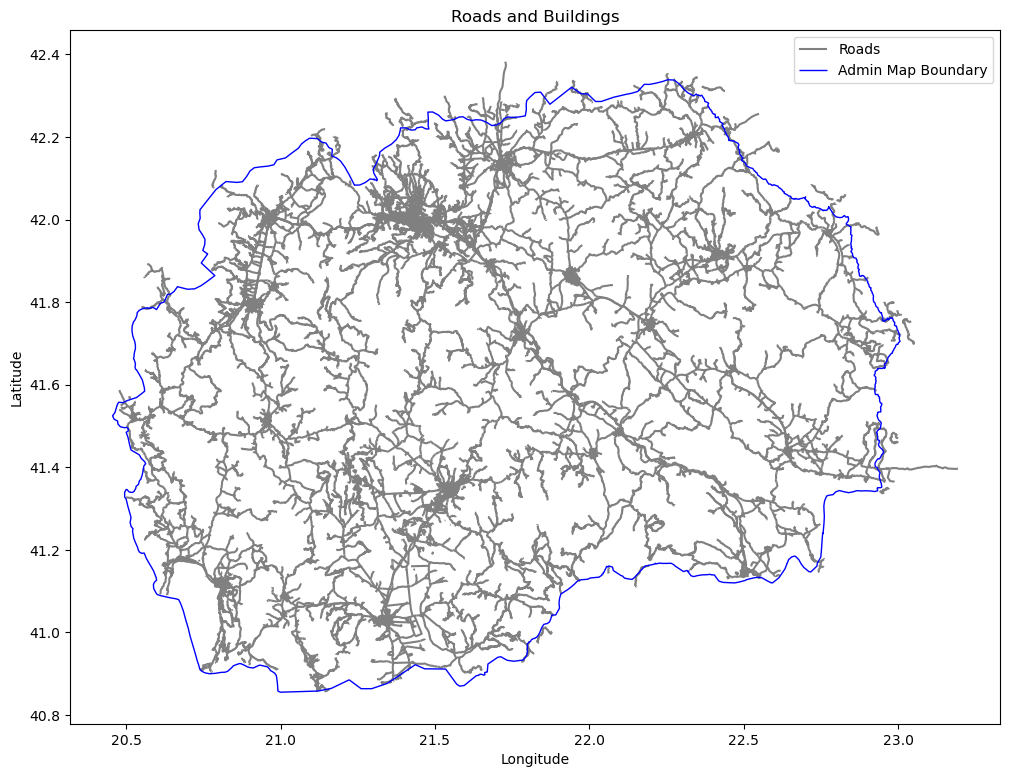

In [43]:
gdf_line = gpd.read_file("macedonia\roads\roads.shp")
gdf_polygon = gpd.read_file("macedonia\MKD_adm\MKD_adm0.shp") # change the path to your shapefile location

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the line and polygon on the same axis
gdf_line.plot(ax=ax, color='gray', label='Roads')
gdf_polygon.boundary.plot(ax=ax, color='blue', linewidth=1, label='Admin Map Boundary')

# Add a legend
ax.legend()

# Add a title
plt.title('Roads and Buildings')

# Set axis titles
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


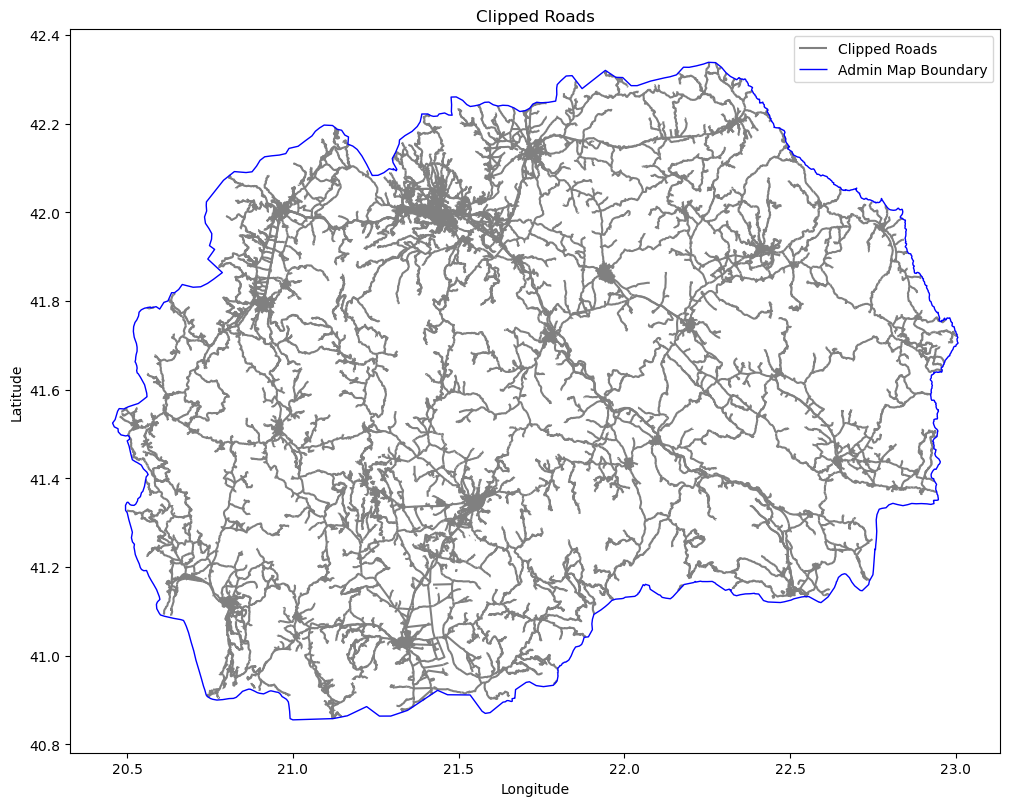

In [50]:
# clip roads to the boundary of the polygon

# Clip the roads to the polygon using geopandas
gdf_clipped_road = gpd.clip(gdf_line, gdf_polygon)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the clipped layer
gdf_clipped_road.plot(ax=ax, color='gray', label='Clipped Roads')

# Plot the polygon on the same axis
gdf_polygon.boundary.plot(ax=ax, color='blue', linewidth=1, label='Admin Map Boundary')

# Add a legend
ax.legend()

# Add a title
plt.title('Clipped Roads')

# Set axis titles
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


## Create the map 

- Create and display the map using points, lines, polygons, and map elements

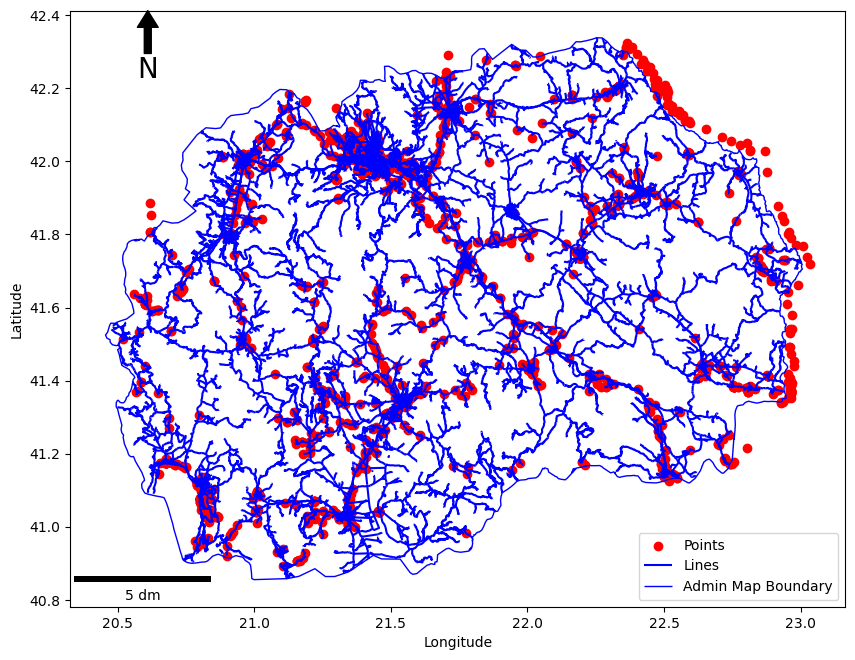

In [70]:
from geodatasets import get_path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar


# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot points, lines, and polygons
gdf.plot(ax=ax, color='red', marker='o', label='Points')
gdf_clipped_road.plot(ax=ax, color='blue', label='Lines')
gdf_polygon.boundary.plot(ax=ax, color='blue', linewidth=1, label='Admin Map Boundary')

# Add legend to bottom-right
ax.legend(loc='lower right')

# Add north arrow to top-left
x_north, y_north, arrow_length = 0.1, 1, 0.1
ax.annotate('N', xy=(x_north, y_north), xytext=(x_north, y_north-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Add scale bar to bottom-left
scalebar = ScaleBar(1, location='lower left')  # Adjust the scale factor if needed
ax.add_artist(scalebar)

#x and y labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the plot
plt.savefig('exported_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



## Raster data

- Show the raster data


In [45]:
# show your raster data 
# import libraries
import rasterio as rio 
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats
from rasterio.mask import mask

# Path to the raster file
raster_path = "macedonia\rasters_AW3D30\output_AW3D30.tif" # change the path to your raster file location
# Open the file:

raster = rio.open(raster_path)

raster.mode
print(raster.mode)
raster.name
print(raster.name)  
raster.height
print(raster.height)
raster.width
print(raster.width) 
raster.transform
print(raster.transform)
raster.crs
print(raster.crs)
raster.count    
print(raster.count)
raster.closed

r
E:/friend_works/Fasih/macedonia/rasters_AW3D30/output_AW3D30.tif
4379
9429
| 0.00, 0.00, 20.40|
| 0.00,-0.00, 42.18|
| 0.00, 0.00, 1.00|
GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
1


False

## 1.2: Explore and Visualize the raster data


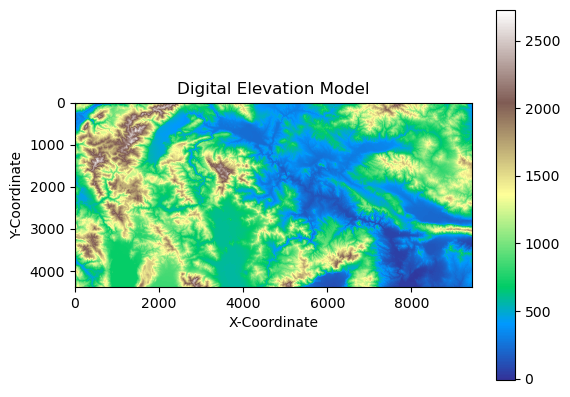

In [46]:
arr = raster.read(1)
arr

arr = np.where(arr == -9999, np.nan, arr)

#plot
plt.imshow(arr, cmap='terrain')
plt.colorbar()  
plt.title("Digital Elevation Model")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.show()


### Calculate the zonal statistics


<Axes: >

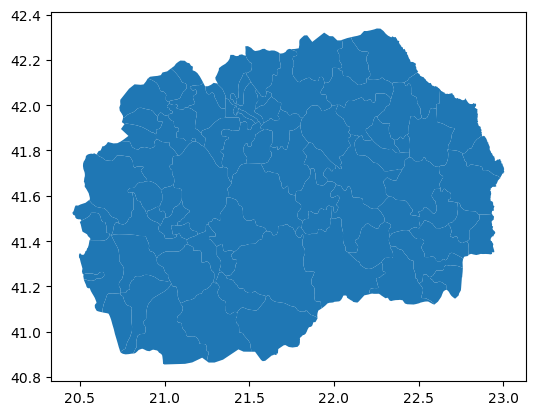

In [47]:

import geopandas as gpd
import rioxarray
# Clip the raster with the GeoDataFrame (gdf_js) geometry

geojson_file = "macedonia\mygeodata\MKD_adm1.geojson"
gdf_js = gpd.read_file(geojson_file)

#plot the gdf_js
gdf_js.plot()

In [48]:
# clip the gdf_js with the raster

zs = zonal_stats("macedonia\mygeodata\MKD_adm1.geojson", 
"macedonia\rasters_AW3D30\output_AW3D30.tif", stats=['mean','std'])
print(zs)

[{'mean': 432.6220244983653, 'std': 157.86072939278012}, {'mean': 283.45671296296297, 'std': 20.090101280040905}, {'mean': 840.3230815635312, 'std': 318.66659583275623}, {'mean': 254.42968540829986, 'std': 27.923129246002922}, {'mean': 772.0100025022178, 'std': 384.8850043631231}, {'mean': 248.54307410316838, 'std': 6.679034043982548}, {'mean': 413.9529918307706, 'std': 148.81424574376953}, {'mean': 570.9846535700511, 'std': 440.56654990992917}, {'mean': 376.35443064573747, 'std': 158.2317776004825}, {'mean': 1065.2132284021798, 'std': 176.54714606407623}, {'mean': 768.5914780985014, 'std': 555.5188197289716}, {'mean': 151.147964810754, 'std': 96.41777665452109}, {'mean': 1231.979884866317, 'std': 662.1836071349719}, {'mean': 413.1499631789863, 'std': 281.20446150471923}, {'mean': 962.5700538688645, 'std': 430.46949643722166}, {'mean': 562.0440541471297, 'std': 303.5388986321296}, {'mean': 1141.2331479530856, 'std': 459.7429175725972}, {'mean': 495.66849261469235, 'std': 195.9762220197

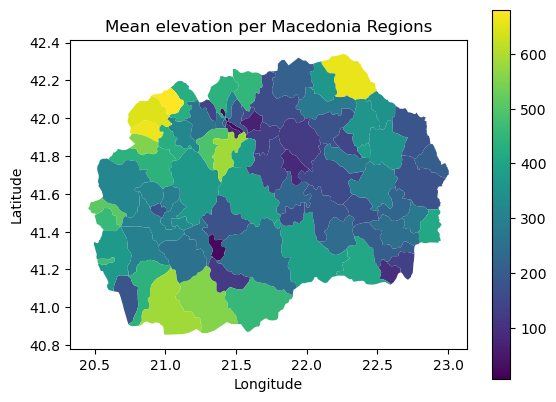

<Figure size 640x480 with 0 Axes>

In [49]:
#   Creating Dataframe of the zs Data
data2stats_df = pd.DataFrame(zs)
data2stats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)

Macedonia_geojson = pd.concat([gdf_js, data2stats_df], axis=1)

#   Plotting Data after Zonal statistic Calculations
fig, ax = plt.subplots(1, 1)
plt.title("Mean elevation per Macedonia Regions")

Macedonia_geojson.plot(column='dem_std', ax=ax, legend=True)

# x label
ax.set_xlabel('Longitude')
# y label
ax.set_ylabel('Latitude')
# show the plot
plt.show()
plt.tight_layout()
